In [50]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix


In [51]:
# Set seaborn style for better visuals
sns.set(style="whitegrid")


In [52]:
# Load JSON file
logins = pd.read_json('logins.json')

In [53]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [54]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [55]:
logins.describe()

,login_time
count,93142
mean,1970-02-26 19:09:39.779648278
min,1970-01-01 20:12:16
25%,1970-02-04 10:37:19.750000
50%,1970-03-01 06:33:05.500000
75%,1970-03-22 04:01:10.750000
max,1970-04-13 18:57:38


In [56]:
# Convert to datetime
logins['login_time'] = pd.to_datetime(logins['login_time'])

In [57]:
# Set as datetime index
logins.set_index('login_time', inplace=True)

In [58]:
# Resample and rename properly
logins_15min = logins.resample('15min').size().to_frame(name='login_count')


In [59]:
logins_15min.head()

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


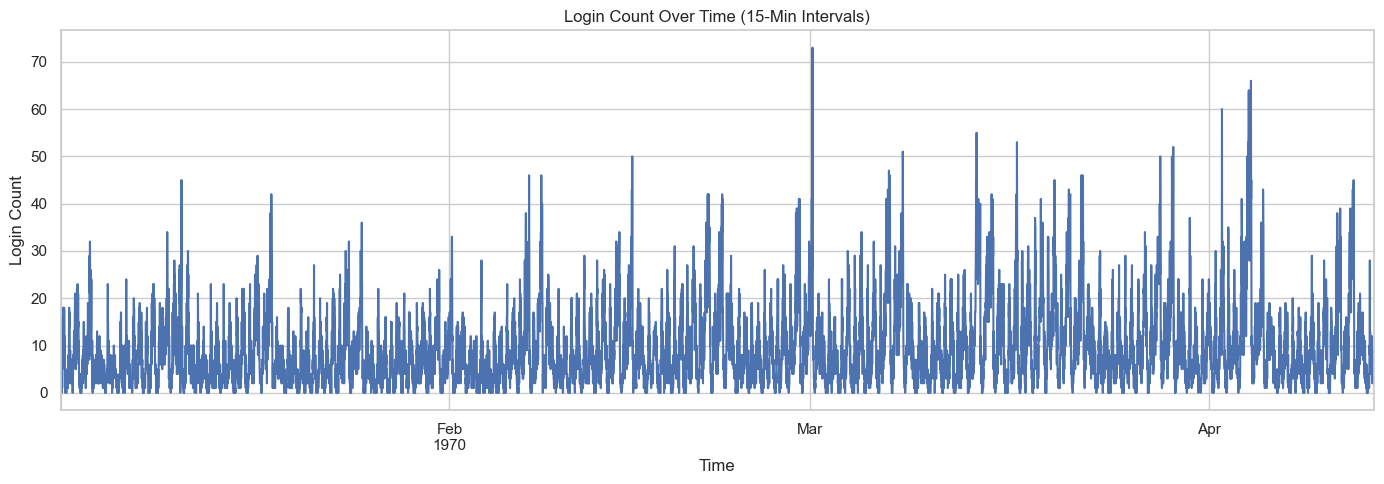

In [60]:
# Plot the full time series
plt.figure(figsize=(14, 5))
logins_15min['login_count'].plot()
plt.title('Login Count Over Time (15-Min Intervals)')
plt.xlabel('Time')
plt.ylabel('Login Count')
plt.tight_layout()
plt.show()

There is no clear trend in logins over the time

<Axes: title={'center': 'Average Logins by Hour of Day'}, xlabel='hour'>

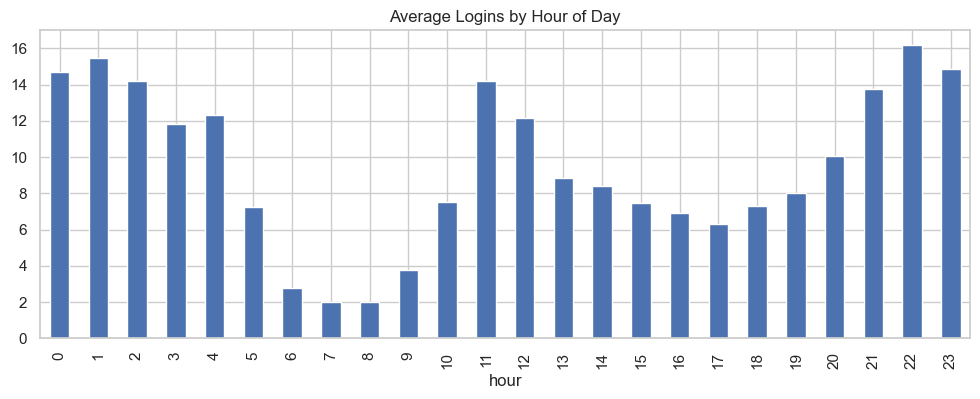

In [61]:
logins_15min['hour'] = logins_15min.index.hour
logins_15min.groupby('hour')['login_count'].mean().plot(kind='bar', figsize=(12, 4), title='Average Logins by Hour of Day')


<Axes: title={'center': 'Avg Logins by Weekday'}, xlabel='weekday'>

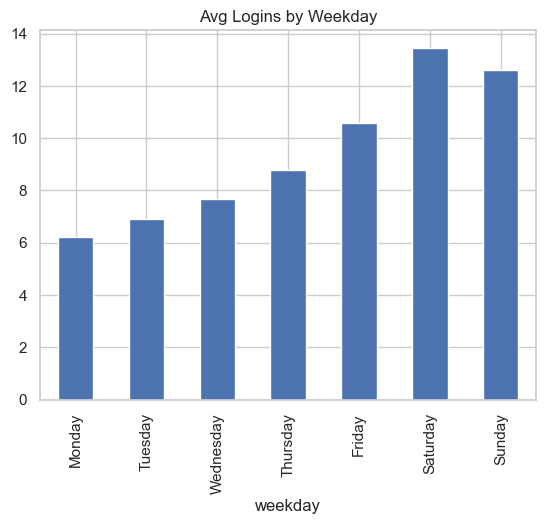

In [62]:
logins_15min['weekday'] = logins_15min.index.day_name()
logins_15min.groupby('weekday')['login_count'].mean().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).plot(kind='bar', title='Avg Logins by Weekday')


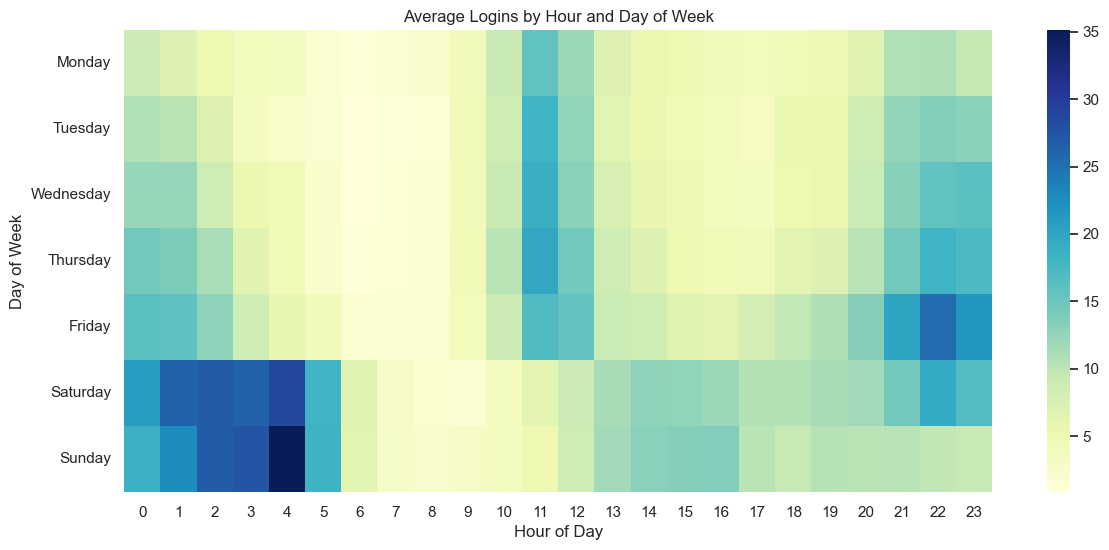

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract hour and weekday
logins_15min['hour'] = logins_15min.index.hour
logins_15min['weekday'] = logins_15min.index.day_name()

# Create pivot table
heatmap_data = logins_15min.pivot_table(values='login_count', 
                                        index='weekday', 
                                        columns='hour', 
                                        aggfunc='mean')

# Reorder days of week
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(ordered_days)

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Average Logins by Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


From the above visualizations:
- Logins are highest on weekends
- Logins are generally higher before noon & midnight
- 

## Part 2

Q1: What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

To evaluate the success of the experiment designed to encourage driver partners to serve both Gotham and Metropolis, we would want to choose a metric that reflects the goal of reducing exclusivity and increasing cross-city service. Here’s a list of potential metrics, along with explanations for why each should be implemented:

1. Percentage of Driver Partners Operating in Both Cities
Explanation: This is a direct metric to measure how many drivers are crossing between the two cities and operating in both. It will provide insight into how well the experiment is overcoming the barrier of city exclusivity. The metric can be calculated by tracking the number of drivers who operate in both Gotham and Metropolis over a given period, and comparing that to the total number of drivers.

    Why it should be implemented: This metric directly measures whether the incentive (reimbursement of toll costs) is effective in encouraging drivers to be active in both cities, which is the primary goal of the experiment.

2. Cross-City Trip Frequency
Explanation: Measure how often drivers are making trips between Gotham and Metropolis during the experiment. You could track the number of cross-city trips per driver or the overall number of cross-city trips taken during a given timeframe.

    Why it should be implemented: This helps gauge the extent of intercity travel among drivers. If the number of trips increases significantly, it suggests that the toll reimbursement is removing the friction for drivers and encouraging them to work in both cities.

Q2. Describe a practical experiment you would design to compare the effectiveness of the
 proposed change in relation to the key measure of success. Please provide details on

a) how you will implement the experiment
1. *Define Groups*:
   - Control Group: Drivers who don’t receive toll reimbursement and operate in a single city.
   - Experimental Group: Drivers who receive toll reimbursement and are encouraged to serve both cities.

2. *Random Assignment*: Randomly assign drivers to either group to eliminate bias.

3. *Data Collection*: Track driver behavior over 4–6 weeks.
   - Metric 1: Percentage of drivers operating in both cities.
   - Metric 3: Number of cross-city trips.

4. *Experiment Control*: Account for external factors (e.g., weather or holidays) that could influence results.

b) what statistical test(s) you will conduct to verify the significance of the
 observation
1. *Two-Proportion Z-Test (Metric 1)*:
    - Purpose: Compare the proportion of drivers in both cities between the groups.
    - Hypothesis: H0: No difference in proportions; H1: Significant difference.

2. *Poisson or Negative Binomial Regression (Metric 2)*:
    - Purpose: Compare the frequency of cross-city trips between the groups.
    - Hypothesis: H0: No difference in trip frequency; H1: Significant difference.

c) how you would interpret the results and provide recommendations to the city
 operations team along with any caveats
1. *Results Interpretation*:
    - Significant Increase in Metric 1 and Metric 2 suggests the experiment is successful in encouraging drivers to operate in both cities.
    - No Significant Change suggests the toll reimbursement isn’t enough to alter driver behavior.

2. *Recommendations*:
    - If successful: Extend the toll reimbursement and possibly optimize for peak hours. Promote the program more actively to drivers.
    - If unsuccessful: Reassess the reimbursement model, explore additional incentives, or gather qualitative feedback from drivers.

3. *Caveats*:
    - Be mindful of external factors influencing behavior.
    - A short-term experiment may not capture long-term effects.
    - Ensure randomization to avoid selection bias.

By analyzing these metrics and tests, we can provide actionable recommendations to improve cross-city service and maximize driver availability.


## Part 3

In [64]:
# Load dataset
df = pd.read_json('ultimate_data_challenge.json')

In [65]:
df.shape

(50000, 12)

In [66]:
# Convert date columns to datetime format
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [67]:
# Check for missing values
missing = df.isnull().sum()
print("Missing Values:\n", missing)

Missing Values:
 city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64


In [68]:
#drop rows with no phone information, since we cannot infer that without building a predictive model
df = df.drop(df[df.phone.isna()==True].index,axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    41578 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  bool          
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49406 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1)

In [69]:
# Check for missing values
missing = df.isnull().sum()
print("Missing Values:\n", missing)

Missing Values:
 city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8026
avg_surge                    0
last_trip_date               0
phone                        0
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       198
dtype: int64


In [70]:
# Correct way to fill missing values without triggering chained assignment warning
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean())
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean())


In [71]:
# Check for missing values
missing = df.isnull().sum()
print("Missing Values:\n", missing)

Missing Values:
 city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64


In [72]:
# Convert date columns to datetime format
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  bool          
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1)

In [74]:
# Define 'retained' as being active in last 30 days of dataset
latest_date = df['last_trip_date'].max()
df['retained'] = df['last_trip_date'] >= (latest_date - pd.Timedelta(days=30))


In [75]:
retention_rate = df['retained'].mean()
print(f"Retention Rate: {retention_rate:.2%}")


Retention Rate: 37.64%


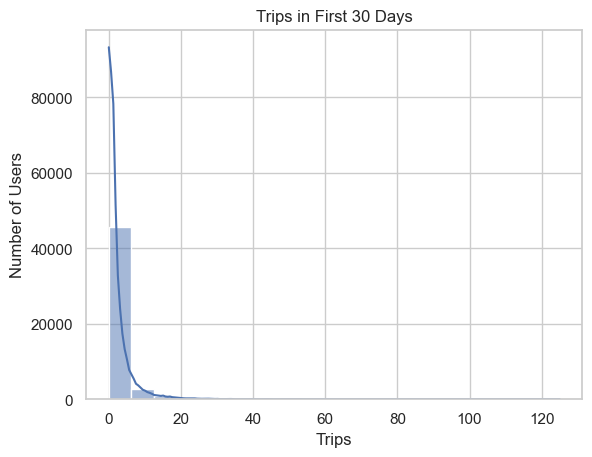

In [76]:
sns.histplot(df['trips_in_first_30_days'], bins=20, kde=True)
plt.title("Trips in First 30 Days")
plt.xlabel("Trips")
plt.ylabel("Number of Users")
plt.show()


In [77]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


In [78]:
df['retained'].value_counts()

retained
False    30933
True     18671
Name: count, dtype: int64

In [79]:

#create dummy variables for categorical features
df_features = pd.get_dummies(df,columns=['city','phone','ultimate_black_user'])
df_features.head()


,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,46.2,3.67,5.0,True,False,True,False,False,True,False,True
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,50.0,8.26,5.0,False,True,False,False,True,False,True,False
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,100.0,0.77,5.0,False,True,False,False,False,True,True,False
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,80.0,2.36,4.9,True,False,True,False,False,True,False,True
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,82.4,3.13,4.9,False,False,False,True,True,False,True,False


In [80]:
X = df_features.drop(columns=['last_trip_date', 'signup_date', 'retained'])

In [81]:
y = df_features['retained']

In [82]:
X.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,False,True,False,False,True,False,True
1,0,5.0,1.00,0.0,50.0,8.26,5.0,True,False,False,True,False,True,False
2,3,4.3,1.00,0.0,100.0,0.77,5.0,True,False,False,False,True,True,False
3,9,4.6,1.14,20.0,80.0,2.36,4.9,False,True,False,False,True,False,True
4,14,4.4,1.19,11.8,82.4,3.13,4.9,False,False,True,True,False,True,False


In [83]:
y.head()

0     True
1    False
2    False
3     True
4    False
Name: retained, dtype: bool

In [84]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Random Forest

In [85]:
# Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [86]:
# Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.80      0.81      0.81      9320
        True       0.68      0.67      0.67      5562

    accuracy                           0.76     14882
   macro avg       0.74      0.74      0.74     14882
weighted avg       0.75      0.76      0.76     14882



In [87]:
cv_score=cross_val_score(model,X_test,np.ravel(y_test),cv=5)
print('Mean Cross Validated Score:',np.mean(cv_score))

Mean Cross Validated Score: 0.7564847522764131


## Logistic Regression

In [88]:
# Initialize and train the model
logreg = LogisticRegression(max_iter=1000)  # increase max_iter in case of convergence warnings
logreg.fit(X_train, y_train)

# Predict on test set
y_pred = logreg.predict(X_test)


In [89]:
# Evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[7881 1439]
 [2796 2766]]

Classification Report:
              precision    recall  f1-score   support

       False       0.74      0.85      0.79      9320
        True       0.66      0.50      0.57      5562

    accuracy                           0.72     14882
   macro avg       0.70      0.67      0.68     14882
weighted avg       0.71      0.72      0.71     14882


Accuracy Score:
0.7154280338664158


In [90]:
feature_importance = pd.Series(logreg.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)
print("\nTop Influential Features:")
print(feature_importance.head(10))



Top Influential Features:
city_King's Landing          1.057713
phone_iPhone                 0.688798
city_Astapor                -0.645734
ultimate_black_user_True     0.583820
phone_Android               -0.409455
ultimate_black_user_False   -0.304478
avg_surge                   -0.211463
avg_rating_by_driver        -0.150289
city_Winterfell             -0.132637
trips_in_first_30_days       0.121419
dtype: float64


## Logistic Regression using Grid Search CV

In [91]:
# Define the parameter grid for logistic regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],       # Regularization type
    'solver': ['liblinear']        # 'liblinear' supports l1 and l2
}

In [92]:
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

In [93]:
# Fit the model using grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [94]:
# Best estimator
best_model = grid_search.best_estimator_

In [95]:
# Predict on the test set
y_pred = best_model.predict(X_test)

In [96]:
# Evaluation metrics
print("Best Parameters:", grid_search.best_params_)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}

Confusion Matrix:
[[7958 1362]
 [2875 2687]]

Classification Report:
              precision    recall  f1-score   support

       False       0.73      0.85      0.79      9320
        True       0.66      0.48      0.56      5562

    accuracy                           0.72     14882
   macro avg       0.70      0.67      0.67     14882
weighted avg       0.71      0.72      0.70     14882


Accuracy Score:
0.7152936433275098
